<a href="https://colab.research.google.com/github/charlottesei/OCP7_Home-Credit/blob/main/P7_02_Mod%C3%A9lisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import math
import nltk
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install -U imbalanced-learn

In [ ]:
!pip install pyngrok

!pip install streamlit

In [ ]:
ap_train = pd.read_csv('/content/drive/My Drive/Projet 7/ap_trainonly.csv')

In [ ]:
ap_train.head(50)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,-637.0,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,-1188.0,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,-225.0,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,-3039.0,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,-3038.0,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,-1588.0,-4970.0,-477,NaN,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,False
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,13778,-3130.0,-1213.

# TRAIN SET

In [ ]:
from sklearn import model_selection

X = ap_train.drop('TARGET', axis=1)
y = ap_train['TARGET']

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, stratify = y, random_state=0)

In [ ]:
X_trainsample, _, y_trainsample, _ = model_selection.train_test_split(
    X_train, y_train,  train_size = 0.05, stratify = y_train, random_state=0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, "Proportion de la variable cible dans le jeu d'entrainement, 246008 individus")

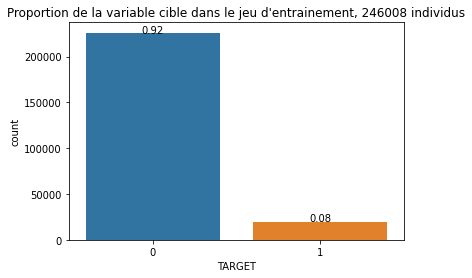

In [ ]:
ax = sns.countplot(y_train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/len(y_train)),
            ha="center") 
ax.set_title('Proportion de la variable cible dans le jeu d\'entrainement, 246008 individus')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Proportion de la variable cible dans le jeu de test, 61503 individus')

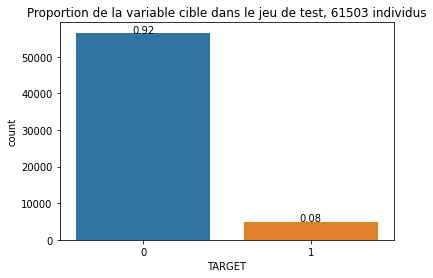

In [ ]:
ax = sns.countplot(y_test)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/len(y_test)),
            ha="center") 
ax.set_title('Proportion de la variable cible dans le jeu de test, 61503 individus')

In [ ]:
X_test.to_csv('/content/drive/My Drive/Projet 7/X_test.csv', index = False)

Enregistrement pour l'app

In [ ]:
y_test[y_test==0]

280198    0
138039    0
98418     0
222654    0
1339      0
         ..
27654     0
209100    0
244443    0
214270    0
72239     0
Name: TARGET, Length: 56538, dtype: int64

In [ ]:
ap_train.iloc[290469,:]

SK_ID_CURR                        436516
TARGET                                 1
NAME_CONTRACT_TYPE            Cash loans
CODE_GENDER                            M
FLAG_OWN_CAR                           N
                                 ...    
AMT_REQ_CREDIT_BUREAU_WEEK             0
AMT_REQ_CREDIT_BUREAU_MON              1
AMT_REQ_CREDIT_BUREAU_QRT              0
AMT_REQ_CREDIT_BUREAU_YEAR             3
DAYS_EMPLOYED_ANOM                 False
Name: 290469, Length: 123, dtype: object

# MODELES

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
selectkbest = SelectKBest()
# selectvarth = VarianceThreshold()

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 0)
rus = RandomUnderSampler(replacement=False, random_state = 0)
ros = RandomOverSampler(random_state = 0)

In [ ]:
categorical = X_trainsample.dtypes == object

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MaxAbsScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocess = make_column_transformer(
    (numeric_transformer, ~categorical),
    (categorical_transformer, categorical))

In [ ]:
from imblearn.pipeline import Pipeline as imb_pipeline
from imblearn.pipeline import make_pipeline as make_imb_pipeline

In [ ]:
baseline = imb_pipeline(steps=[
    ('preprocess', preprocess),
    ('sampler', smote),
    ('selector', selectkbest),
    ('logisticregression', LogisticRegression())])

In [ ]:
baseline.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, baseline.predict(X_test))

0.6748638217709684

# gridsearch_cv

In [ ]:
def plot_cv_results(cv_results, listparamsnum, paramscat):
    """
    cv_results - cv_results_ attribute of a GridSearchCV instance (or similar)
    param_x - name of grid search parameter to plot on x axis
    param_z - name of grid search parameter to plot by line color
    """
    cv_results = pd.DataFrame(cv_results)
    fig, ax = plt.subplots(1, len(listparamsnum), figsize=(30, 8))
    c=0
    for i in listparamsnum:
      col_x = 'param_' + str(i)
      col_z = 'param_' + paramscat
      sns.pointplot(x=col_x, y='mean_test_score', hue = col_z, data=cv_results, ci=99, n_boot=64, ax=ax[c])
      ax[c].set_title("CV Grid Search Results")
      ax[c].set_xlabel(i)
      ax[c].set_ylabel('mean_test_score')
      ax[c].legend(title=paramscat)
      c = c+1

## regressionlogistic

In [ ]:
modellogistic = imb_pipeline(steps=[
    ('preprocess', preprocess),
    ('sampler', smote),
    ('selector', selectkbest),
    ('logisticregression', LogisticRegression())])

In [ ]:
modellogistic.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocess', 'sampler', 'selector', 'logisticregression', 'preprocess__n_jobs', 'preprocess__remainder', 'preprocess__sparse_threshold', 'preprocess__transformer_weights', 'preprocess__transformers', 'preprocess__verbose', 'preprocess__pipeline-1', 'preprocess__pipeline-2', 'preprocess__pipeline-1__memory', 'preprocess__pipeline-1__steps', 'preprocess__pipeline-1__verbose', 'preprocess__pipeline-1__imputer', 'preprocess__pipeline-1__scaler', 'preprocess__pipeline-1__imputer__add_indicator', 'preprocess__pipeline-1__imputer__copy', 'preprocess__pipeline-1__imputer__fill_value', 'preprocess__pipeline-1__imputer__missing_values', 'preprocess__pipeline-1__imputer__strategy', 'preprocess__pipeline-1__imputer__verbose', 'preprocess__pipeline-1__scaler__clip', 'preprocess__pipeline-1__scaler__copy', 'preprocess__pipeline-1__scaler__feature_range', 'preprocess__pipeline-2__memory', 'preprocess__pipeline-2__steps', 'preprocess__pipeline-2__verbose', 'pr

In [ ]:
param_logistic = {'preprocess__pipeline-1__scaler': [StandardScaler(), MinMaxScaler(), MaxAbsScaler()],
                  'sampler': [rus, ros, smote],
                  'selector__k': list(range(10,200,25))}
gridlogistic = GridSearchCV(modellogistic, param_grid=param_logistic,
                    n_jobs=-1, return_train_score=True, scoring = 'roc_auc')
gridlogistic.fit(X_trainsample, y_trainsample)

In [ ]:
gridlogistic.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_preprocess__pipeline-1__scaler', 'param_sampler', 'param_selector__k', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [ ]:
gridlogistic.best_params_

{'preprocess__pipeline-1__scaler': StandardScaler(),
 'sampler': RandomOverSampler(random_state=0),
 'selector__k': 35}

In [ ]:
gridlogistic.cv_results_['mean_test_score'][gridlogistic.best_index_]

0.7395905329422601

## SVC

In [ ]:
modelsvc = imb_pipeline(steps=[
    ('preprocess', preprocess),
    ('sampler', smote),
    ('selector', selectkbest),
    ('svc', LinearSVC())])

In [ ]:
param_svc = {'preprocess__pipeline-1__scaler': [StandardScaler(), MinMaxScaler(), MaxAbsScaler()],
             'sampler': [rus, ros, smote],
             'selector__k':list(range(10,200,25))}
gridsvc = GridSearchCV(modelsvc, param_grid=param_svc,
                    n_jobs=-1, return_train_score=True, scoring = 'roc_auc')
gridsvc.fit(X_trainsample, y_trainsample)

In [ ]:
gridsvc.best_params_

{'preprocess__pipeline-1__scaler': MinMaxScaler(),
 'sampler': RandomOverSampler(random_state=0),
 'selector__k': 35}

In [ ]:
gridsvc.cv_results_['mean_test_score'][gridsvc.best_index_]

0.7400650485699676

## LGBM

In [ ]:
modellgbm = imb_pipeline(steps=[
    ('preprocess', preprocess),
    ('sampler', smote),
    ('selector', selectkbest),
    ('lgbm', LGBMClassifier())])

In [ ]:
param_lgbm= {'preprocess__pipeline-1__scaler': [StandardScaler(), MinMaxScaler(), MaxAbsScaler()], 
             'sampler': [rus, ros, smote], 
             'selector__k': list(range(10,200,25))}
gridlgbm = GridSearchCV(modellgbm, param_grid=param_lgbm,
                    n_jobs=-1, return_train_score=True, scoring = 'roc_auc')
gridlgbm.fit(X_trainsample, y_trainsample)

In [ ]:
gridlgbm.best_params_

{'preprocess__pipeline-1__scaler': StandardScaler(),
 'sampler': RandomOverSampler(random_state=0),
 'selector__k': 135}

In [ ]:
gridlgbm.cv_results_['mean_test_score'][gridlgbm.best_index_]

0.7210891191397705

## Random Forest

In [ ]:
modelrandomforest = imb_pipeline(steps=[
    ('preprocess', preprocess),
    ('sampler', smote),
    ('selector', selectkbest),
    ('randomforest', RandomForestClassifier())])

In [ ]:
param_randomforest = {'preprocess__pipeline-1__scaler': [StandardScaler(), MinMaxScaler(), MaxAbsScaler()],
                      'sampler': [rus, ros, smote],
                      'selector__k': list(range(10,200,25))}
gridrandomforest = GridSearchCV(modelrandomforest, param_grid=param_randomforest,
                    n_jobs=-1, return_train_score=True, scoring = 'roc_auc')
gridrandomforest.fit(X_trainsample, y_trainsample)

In [ ]:
gridrandomforest.best_params_

{'preprocess__pipeline-1__scaler': MaxAbsScaler(),
 'sampler': RandomOverSampler(random_state=0),
 'selector__k': 35}

In [ ]:
gridrandomforest.cv_results_['mean_test_score'][gridrandomforest.best_index_]

0.7226952679437828

## KNN

In [ ]:
modelknn = imb_pipeline(steps=[
    ('preprocess', preprocess),
    ('sampler', smote),
    ('selector', selectkbest),
    ('knn', KNeighborsClassifier())])

In [ ]:
param_knn = {'preprocess__pipeline-1__scaler': [StandardScaler(), MinMaxScaler(), MaxAbsScaler()],
             'sampler': [rus, ros, smote],
             'selector__k':  list(range(10,200,25))}
gridknn = GridSearchCV(modelknn, param_grid=param_knn,
                    n_jobs=-1, return_train_score=True, scoring = 'roc_auc')
gridknn.fit(X_trainsample, y_trainsample)

In [ ]:
gridknn.best_params_

{'preprocess__pipeline-1__scaler': MaxAbsScaler(),
 'sampler': RandomUnderSampler(random_state=0),
 'selector__k': 35}

In [ ]:
gridknn.cv_results_['mean_test_score'][gridknn.best_index_]

0.6507902501241809

## XGB

In [ ]:
modelxgb = imb_pipeline(steps=[
    ('preprocess', preprocess),
    ('sampler', smote),
    ('selector', selectkbest),
    ('xgb', XGBClassifier())])

In [ ]:
param_xgb = {'preprocess__pipeline-1__scaler': [StandardScaler(), MinMaxScaler(), MaxAbsScaler()],
             'sampler': [rus, ros, smote],
             'selector__k': list(range(10,200,25))}
gridxgb = GridSearchCV(modelxgb, param_grid=param_xgb,
                    n_jobs=-1, return_train_score=True, scoring = 'roc_auc')
gridxgb.fit(X_trainsample, y_trainsample)

In [ ]:
gridxgb.best_params_

{'preprocess__pipeline-1__scaler': MaxAbsScaler(),
 'sampler': RandomOverSampler(random_state=0),
 'selector__k': 35}

In [ ]:
gridxgb.cv_results_['mean_test_score'][gridxgb.best_index_]

0.7337675802271386

# Scores cross_validate

In [ ]:
list_score_train=[]
list_score_test=[]
list_time_train=[]
list_time_test = []

list_of_grids = [gridlogistic, gridsvc, gridlgbm, gridrandomforest, gridknn, gridxgb]

for grid in list_of_grids:
  list_score_test.append(grid.cv_results_['mean_test_score'][grid.best_index_])
  list_score_train.append(grid.cv_results_['mean_train_score'][grid.best_index_])
  list_time_test.append(grid.cv_results_['mean_score_time'][grid.best_index_])
  list_time_train.append(grid.cv_results_['mean_fit_time'][grid.best_index_])
data_bestresult = pd.DataFrame(data={'model':['gridlogistic', 'gridsvc', 'gridlgbm', 'gridrandomforest', 'gridknn', 'gridxgb'],
                                     'mean_score_train':list_score_train,
                                     'mean_score_test':list_score_test, 
                                     'mean_time_train':list_time_train,
                                     'mean_time_test':list_time_test})
data_bestresult 

,model,mean_score_train,mean_score_test,mean_time_train,mean_time_test
0,gridlogistic,0.752420,0.739591,0.972953,0.067023
1,gridsvc,0.751906,0.740065,2.017171,0.068047
2,gridlgbm,0.992485,0.721089,3.116567,0.087681
3,gridrandomforest,1.000000,0.722695,3.993857,0.131265
4,gridknn,0.739448,0.650790,0.536391,0.167575
5,gridxgb,0.848218,0.733768,3.041840,0.074816


In [ ]:
data_bestresult.to_csv('/content/drive/My Drive/Projet 7/data_bestresult.csv')

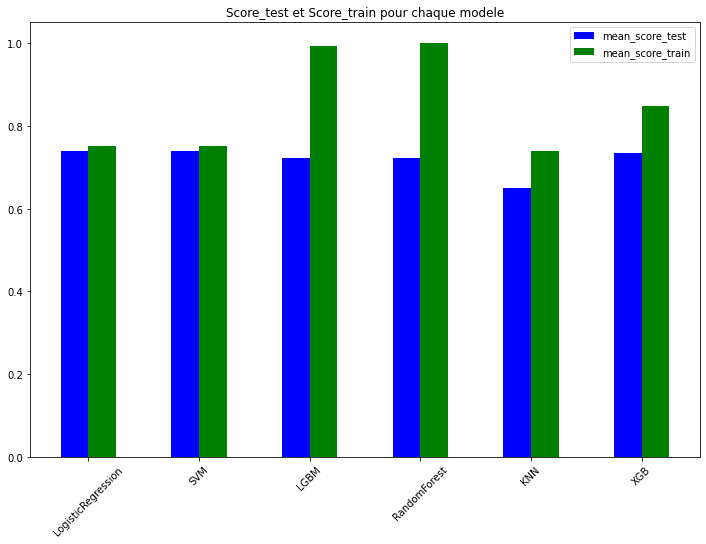

In [ ]:
x = np.arange(len(data_bestresult))
width=0.25
fig = plt.figure(figsize=(12,8))
plt.title('Score_test et Score_train pour chaque modele')
plt.xticks(x,['LogisticRegression', 'SVM', 'LGBM', 'RandomForest', 'KNN', 'XGB'],rotation=45)
plt.bar(x - width/2, data_bestresult['mean_score_test'], width, label='mean_score_test', color='b')
plt.bar(x + width/2, data_bestresult['mean_score_train'], width, label='mean_score_train', color='g')
plt.legend()

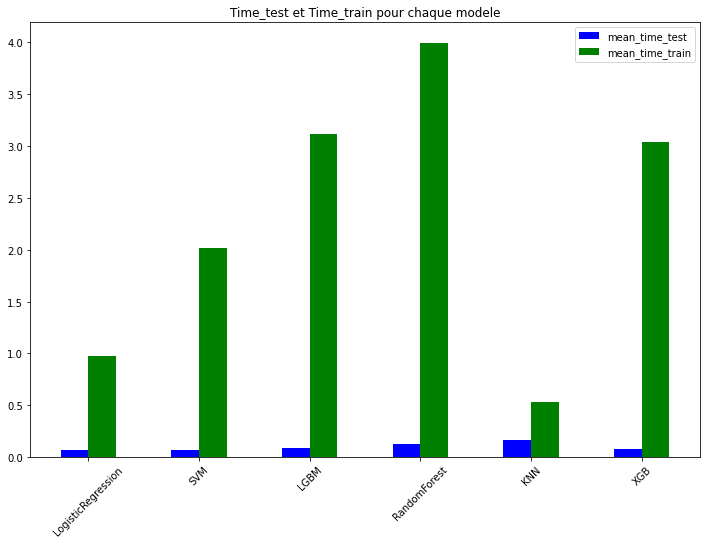

In [ ]:
x = np.arange(len(data_bestresult))
width=0.25
fig = plt.figure(figsize=(12,8))
plt.title('Time_test et Time_train pour chaque modele')
plt.xticks(x,['LogisticRegression', 'SVM', 'LGBM', 'RandomForest', 'KNN', 'XGB'],rotation=45)
plt.bar(x - width/2, data_bestresult['mean_time_test'], width, label='mean_time_test', color='b')
plt.bar(x + width/2, data_bestresult['mean_time_train'], width, label='mean_time_train', color='g')
plt.legend()

# choix des hyperparamètres pour Logisticregression


In [ ]:
modellogistic.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocess', 'sampler', 'selector', 'logisticregression', 'preprocess__n_jobs', 'preprocess__remainder', 'preprocess__sparse_threshold', 'preprocess__transformer_weights', 'preprocess__transformers', 'preprocess__verbose', 'preprocess__pipeline-1', 'preprocess__pipeline-2', 'preprocess__pipeline-1__memory', 'preprocess__pipeline-1__steps', 'preprocess__pipeline-1__verbose', 'preprocess__pipeline-1__imputer', 'preprocess__pipeline-1__scaler', 'preprocess__pipeline-1__imputer__add_indicator', 'preprocess__pipeline-1__imputer__copy', 'preprocess__pipeline-1__imputer__fill_value', 'preprocess__pipeline-1__imputer__missing_values', 'preprocess__pipeline-1__imputer__strategy', 'preprocess__pipeline-1__imputer__verbose', 'preprocess__pipeline-1__scaler__clip', 'preprocess__pipeline-1__scaler__copy', 'preprocess__pipeline-1__scaler__feature_range', 'preprocess__pipeline-2__memory', 'preprocess__pipeline-2__steps', 'preprocess__pipeline-2__verbose', 'pr

In [ ]:
param_logistic = {'preprocess__pipeline-1__scaler': [StandardScaler(), MinMaxScaler(), MaxAbsScaler()],
                  'sampler': [rus, ros, smote],
                  'selector__k': list(range(10,200,25)),
                  'logisticregression__C':[0.001, 0.01, 0.1, 1, 10, 100],
                  'logisticregression__penalty' : ['l1', 'l2'],
                  'logisticregression__solver':['newton-cg', 'lbfgs', 'saga']}
gridlogistic = GridSearchCV(modellogistic, param_grid=param_logistic,
                    n_jobs=-1, return_train_score=True, scoring = 'roc_auc')
gridlogistic.fit(X_trainsample, y_trainsample)

In [ ]:
gridlogistic.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_logisticregression__C', 'param_logisticregression__penalty', 'param_logisticregression__solver', 'param_preprocess__pipeline-1__scaler', 'param_sampler', 'param_selector__k', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [ ]:
gridlogistic.best_params_

{'logisticregression__C': 0.1,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'lbfgs',
 'preprocess__pipeline-1__scaler': StandardScaler(),
 'sampler': RandomOverSampler(random_state=0),
 'selector__k': 35}

In [ ]:
gridlogistic.cv_results_['mean_test_score'][gridlogistic.best_index_]

0.7401708099763874

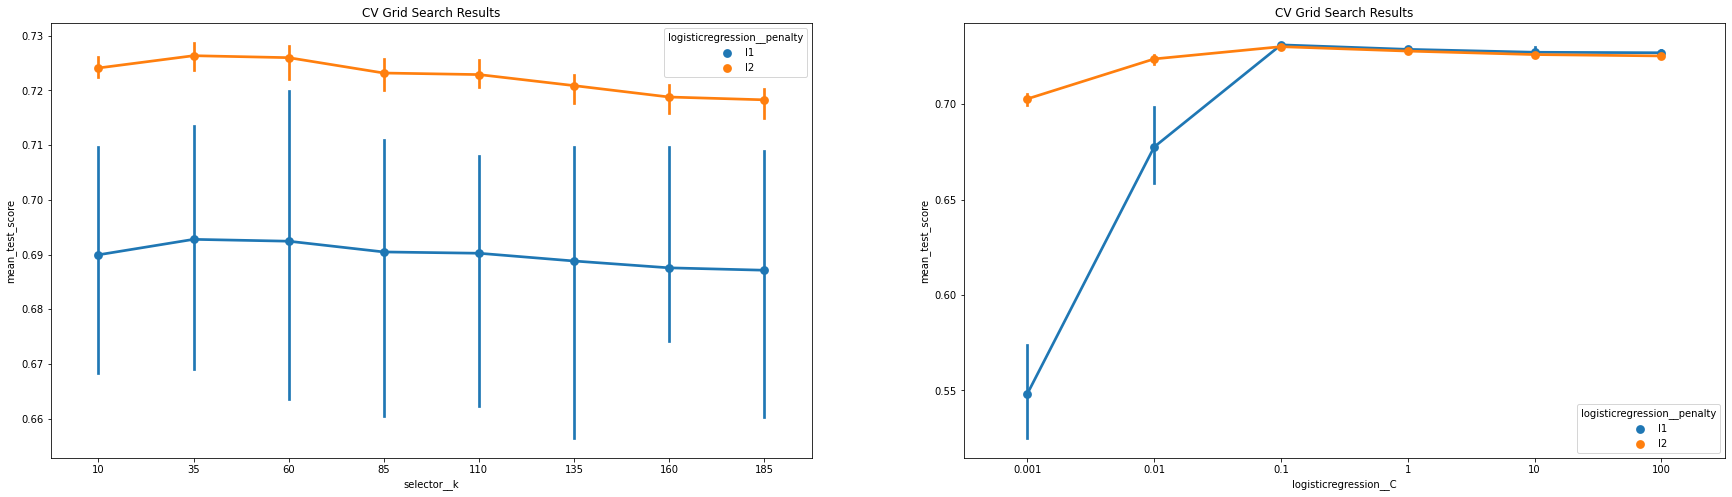

In [ ]:
plot_cv_results(gridlogistic.cv_results_, ['selector__k', 'logisticregression__C'], 'logisticregression__penalty')

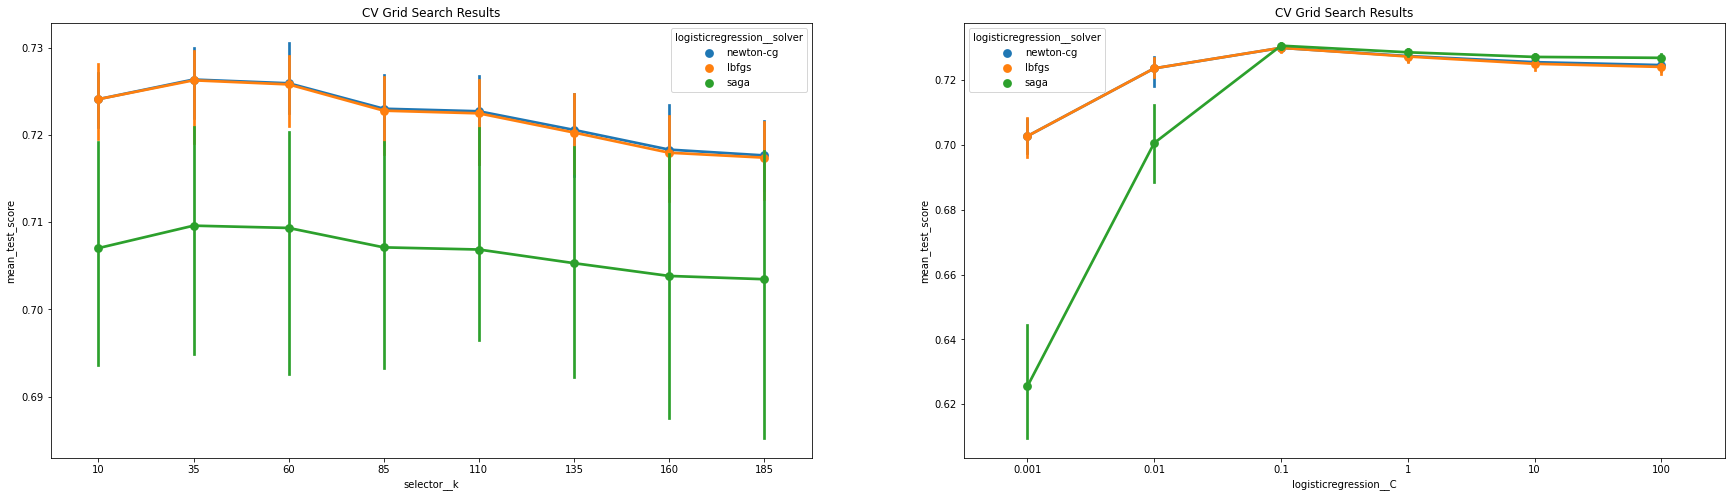

In [ ]:
plot_cv_results(gridlogistic.cv_results_, ['selector__k', 'logisticregression__C'], 'logisticregression__solver')

In [ ]:
param_bestlogistic = {'preprocess__pipeline-1__scaler': [StandardScaler(), MinMaxScaler(), MaxAbsScaler()], 
                      'sampler': [ros],
                      'selector__k': [30, 32, 34, 36, 38, 40, 42, 44, 45, 46, 47, 48, 49, 50, 52, 54, 56, 58, 60],
                      'logisticregression__C':[0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1],
                      'logisticregression__penalty' : ['l2'],
                      'logisticregression__solver':['newton-cg', 'lbfgs']}
gridbestlogistic = GridSearchCV(modellogistic, param_grid=param_bestlogistic,
                    n_jobs=-1, return_train_score=True, scoring = 'roc_auc')
gridbestlogistic.fit(X_trainsample, y_trainsample)

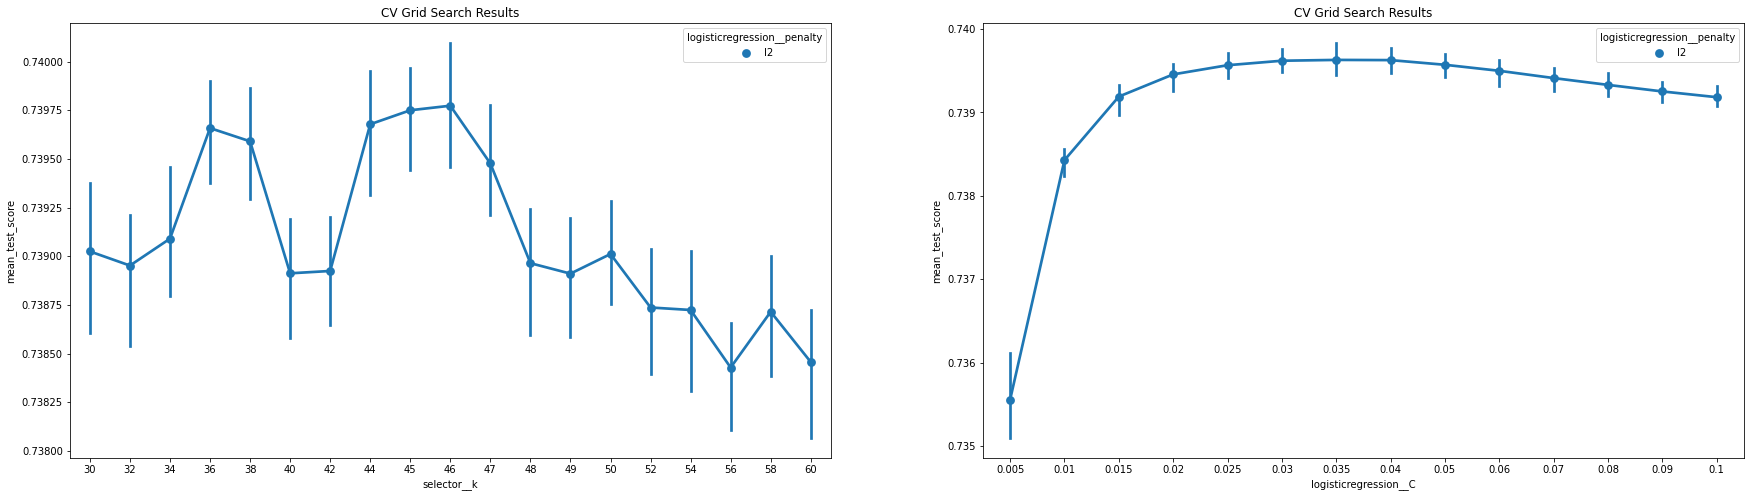

In [ ]:
plot_cv_results(gridbestlogistic.cv_results_, ['selector__k', 'logisticregression__C'], 'logisticregression__penalty')

In [ ]:
gridbestlogistic.best_params_

{'logisticregression__C': 0.03,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'newton-cg',
 'preprocess__pipeline-1__scaler': MaxAbsScaler(),
 'sampler': RandomOverSampler(random_state=0),
 'selector__k': 46}

In [ ]:
gridbestlogistic.cv_results_['mean_test_score'][gridbestlogistic.best_index_]

0.7410488537689612

# custom score

In [ ]:
bestmodel = imb_pipeline(steps=[
    ('preprocess', preprocess),
    ('sampler', ros),
    ('selector', SelectKBest(k = 46)),
    ('logisticregression', LogisticRegression(C = 0.03,
                      penalty = 'l2',
                      solver = 'newton-cg'))])

In [ ]:
bestmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [12] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MaxAbsScaler())]),
                                                  SK_ID_CURR                     True
NAME_CONTRACT_TYPE            False
CODE_GENDER                   False
FLAG_OWN_CAR                  False
FLAG_OWN_REALTY               False
                              ...  
AMT_REQ_CREDIT_BUREAU_WEEK     True
AMT_REQ_CREDIT_BUREAU_MON      True
AMT_REQ_CREDIT_BUREAU_QRT      True
AMT_...
FLAG_OWN_CAR                   True
FLAG_OWN_REALTY                True
                              ...  
AMT_REQ_CREDIT_BUREAU_WEEK    False
AMT_REQ_CREDIT_BUREAU_MON     False


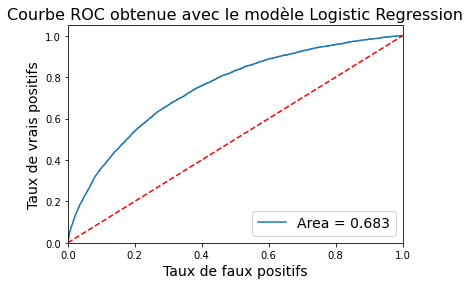

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
rf_roc_auc = roc_auc_score(y_test, bestmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, bestmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Area = %0.3f' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs', fontsize=14)
plt.ylabel('Taux de vrais positifs', fontsize=14)
plt.title('Courbe ROC obtenue avec le modèle Logistic Regression', fontsize=16)
plt.legend(loc="lower right", fontsize=14)
plt.savefig('RF_ROC', fontsize=14)
plt.show();

### Fixer le seuil de probabilité

In [ ]:
from sklearn.metrics import confusion_matrix 
def confusion_matrix_scorer(y_true, y_predict):
    cf = confusion_matrix(y_true, y_predict, normalize = 'true')
    cf = cf
    tn = cf[0, 0]
    fp = cf[0, 1]
    fn = cf[1, 0]
    tp = cf[1, 1]
    return (3*fn+fp)

In [ ]:
from sklearn.metrics import make_scorer
custom_scorer = make_scorer(confusion_matrix_scorer, greater_is_better=False)

In [ ]:
prob = bestmodel.predict_proba(X_test)[:,1]
listseuil = np.linspace(0,1,101)
custom_score = []
for seuil in listseuil:
  targetpred = []
  for i in range(0,len(prob)) :
    if prob[i] >= seuil :
      targetpred.append(1)
    else :
      targetpred.append(0)
  custom_score.append(confusion_matrix_scorer(y_test, targetpred))
print(custom_score)

[1.0, 1.0, 1.0, 1.0, 0.999911563903923, 0.9993986345466765, 0.9984081502706145, 0.9969931727333828, 0.9953688127194938, 0.9939624276440443, 0.9916363071693941, 0.9874501645232001, 0.9837501692576038, 0.9794134341002533, 0.9751914147199772, 0.9696605411177618, 0.9655561016684873, 0.9631993304719582, 0.9560732406907784, 0.9500494868088077, 0.943604103819595, 0.9397878858899701, 0.9338668888737132, 0.9347339152909376, 0.928992654620762, 0.9269326974056644, 0.9234018368417616, 0.9155734843041693, 0.9168793247521999, 0.9221614230741156, 0.9259401077627227, 0.9304764787236646, 0.9300786178191627, 0.9336747020077613, 0.9363304994240165, 0.9463460395965007, 0.9586164490711218, 0.9733716616976802, 0.9808436087527261, 0.9992743965265081, 1.019553247560473, 1.0348185253903506, 1.057658656760969, 1.0823382589299884, 1.1066316064301966, 1.129993761915495, 1.1547766232458794, 1.1854956573334792, 1.2239253144076883, 1.2476589014965096, 1.278248396741747, 1.3094363932863804, 1.3391859967667123, 1.3713

In [ ]:
custom_score.index(min(custom_score))

27

Text(0.5, 1.0, 'Choix du seuil de décision')

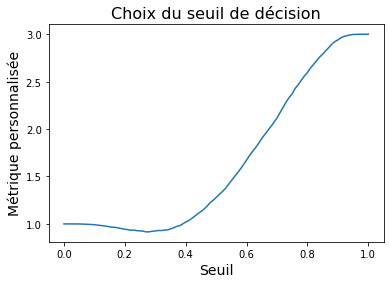

In [ ]:
plt.plot(listseuil, custom_score)
plt.xlabel('Seuil', fontsize = 14)
plt.ylabel('Métrique personnalisée', fontsize = 14)
plt.title('Choix du seuil de décision', fontsize = 16)

In [ ]:
targetpred = []
for i in range(0,len(prob)) :
  if prob[i] >= 0.27 :
    targetpred.append(1)
  else :
    targetpred.append(0)

### confusionmatrix

Text(33.0, 0.5, 'true')

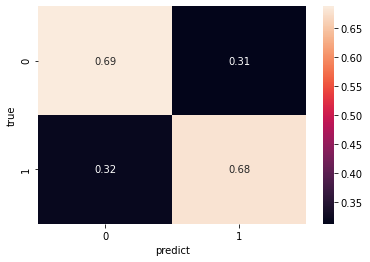

In [ ]:
cf = confusion_matrix(y_test, bestmodel.predict(X_test), normalize = 'true')
cf = cf
ax = sns.heatmap(cf, annot =True)
ax.set_xlabel('predict')
ax.set_ylabel('true')

Text(33.0, 0.5, 'true')

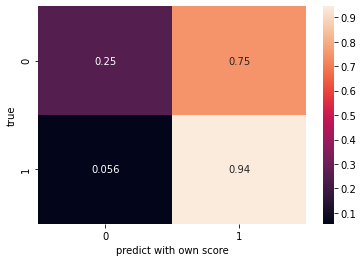

In [ ]:
cf = confusion_matrix(y_test, targetpred, normalize = 'true')
cf = cf
ax = sns.heatmap(cf, annot =True)
ax.set_xlabel('predict with own score')
ax.set_ylabel('true')

# save model 

In [ ]:
import pickle 
classifier_out = open("classifier.pkl", mode = "wb") 
pickle.dump(bestmodel, classifier_out) 
classifier_out.close()

# Shap

In [ ]:
! pip install shap

In [ ]:
import shap

2021-07-19 13:20:07.512603: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [ ]:
explainer = shap.KernelExplainer(bestmodel.predict_proba, X_train.iloc[0:2000, :], link = 'logit')

Using 2000 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [ ]:
shap_values = explainer.shap_values(X_test.iloc[0:100, :], n_sample = 100)

In [ ]:
len(shap_values)

2

In [ ]:
shap_values[0].shape

(100, 122)

In [ ]:
bestmodel.predict_proba(X_test)[30][1]

0.26062922587495524

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][30,:], X_test.iloc[30,:], link='logit') # première étiquette

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][30,:], X_test.iloc[30,:], link='logit') # deuxième étiquette

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0:200, :]) 

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[0:200, :]) 

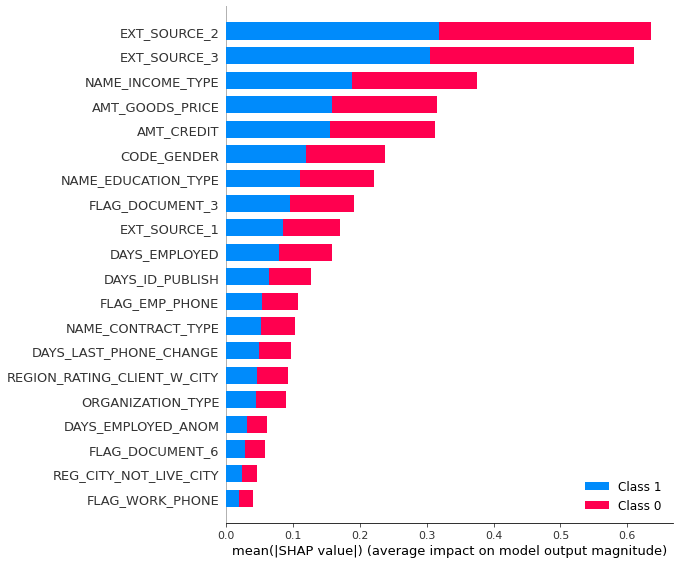

In [ ]:
shap.summary_plot(shap_values, X_test.iloc[0:2000, :])

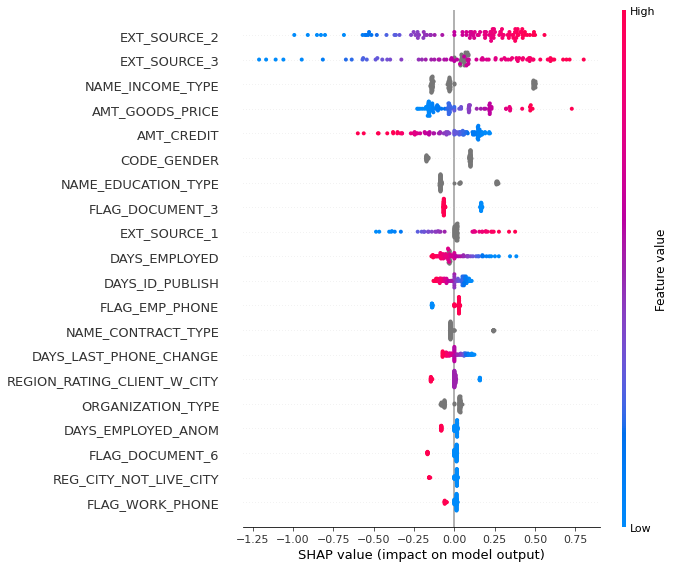

In [ ]:
shap.summary_plot(shap_values[0], X_test.iloc[0:100, :])

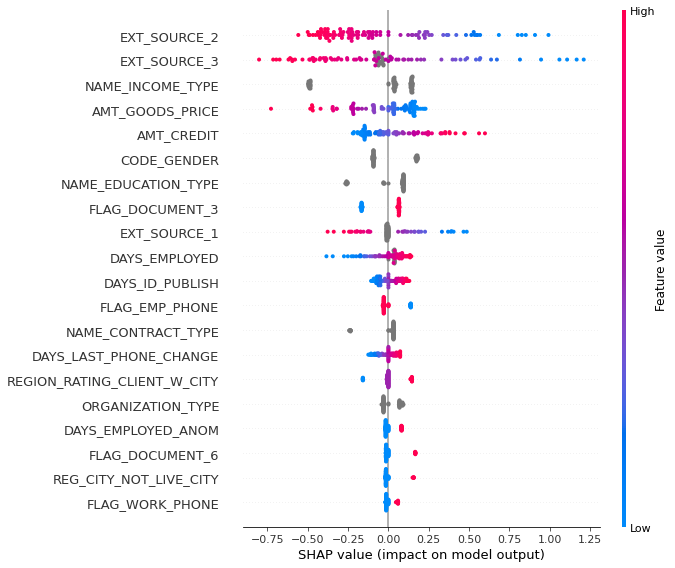

In [ ]:
shap.summary_plot(shap_values[1], X_test.iloc[0:100, :])

In [ ]:
# get important features
vals = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame(list(zip(X_test.iloc[0:100, :].columns,sum(vals))),columns=['col_name','feature_importance_vals'])
importance_df = importance_df.sort_values('feature_importance_vals', ascending=False)
importance_df.head(20)

,col_name,feature_importance_vals
41,EXT_SOURCE_2,31.816838
42,EXT_SOURCE_3,30.546233
11,NAME_INCOME_TYPE,18.736218
9,AMT_GOODS_PRICE,15.762378
7,AMT_CREDIT,15.580238
2,CODE_GENDER,11.889425
12,NAME_EDUCATION_TYPE,11.036561
96,FLAG_DOCUMENT_3,9.518855
40,EXT_SOURCE_1,8.488728
17,DAYS_EMPLOYED,7.922322


In [ ]:
shap_out = open("shap.pkl", mode = "wb") 
pickle.dump(shap_values, shap_out) 
shap_out.close()